## Accessing High Resolution Electricity Access (HREA) data on Azure

The [HREA](http://www-personal.umich.edu/~brianmin/HREA/index.html) project aims to provide open access to new indicators of electricity access and reliability across the world. Leveraging VIIRS satellite imagery with computational methods, these high-resolution data provide new tools to track progress towards reliable and sustainable energy access across the world.

This notebook provides an example of accessing HREA data from Azure Blob Storage.

### Imports and constants

In [8]:
import matplotlib.colors as colors
import rasterio

from rasterio.plot import show
from matplotlib import pyplot

# Read nighttime light annual composite data for Djibouti from 2019
year = '2019'
country = 'Djibouti'
variable = 'rade9lnmu' # 'set_zscore_sy', 'set_lightscore_sy', 'set_prplit_conf90_sy'

url_base = 'https://hreadatasa.blob.core.windows.net/hrea/HREA/HREA_{}_{}_v1/{}_{}_{}.tif'
url = url_base.format(country,year,country,variable,year)

### Read and plot the entire file

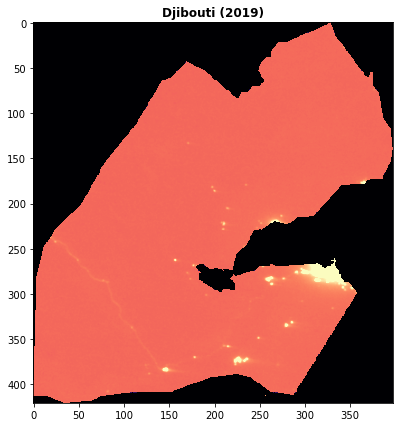

In [5]:
with rasterio.open(url) as src:
    raster = src.read()
fig, xraster = pyplot.subplots(1, 1, figsize=(14,7))
show(raster, ax=xraster,norm=colors.PowerNorm(1,vmin=.01,vmax=1.4), cmap='magma',
     title='{} ({})'.format(country,year));
pyplot.show()

### Read a window

Cloud Optimized GeoTIFFs allows users to download and read sections of a file, rather than the entire file, when only part of the region is required.

(1, 165, 256)


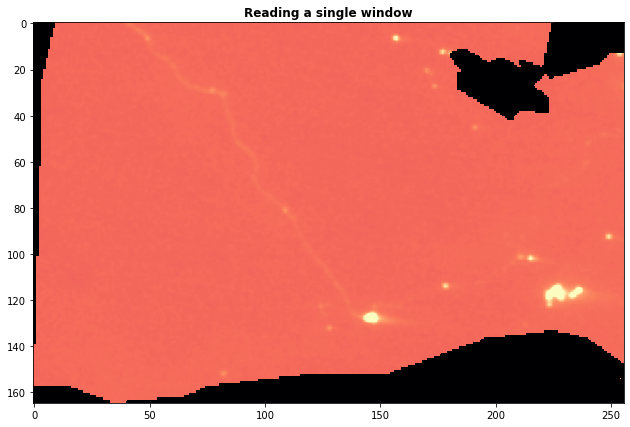

In [11]:
# Reading only the second window of the file, as an example
i_window = 2
with rasterio.Env():
    with rasterio.open(url) as src:
        ij, window = list(src.block_windows())[i_window]
        section = src.read(window=window)
print(section.shape)
fig, xsection = pyplot.subplots(1, 1, figsize=(14,7))        
show(section, ax=xsection,norm=colors.PowerNorm(1,vmin=.01,vmax=1.4), cmap='magma',
     title='Reading a single window');
pyplot.show()

### Zoom in on a region within the retrieved window

Let's focus on the city of Dikhil, situated around:

x,y=[120:135,140:155]


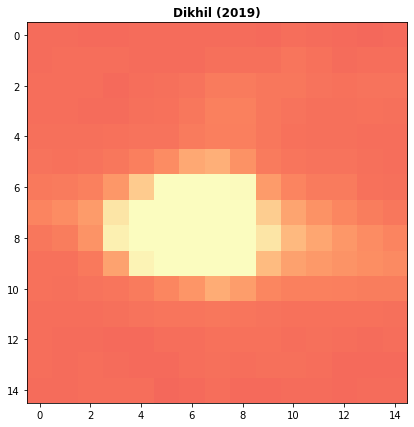

In [7]:
fig, xsection = pyplot.subplots(1, 1, figsize=(14,7))        
show(section[:,120:135,140:155], ax=xsection,norm=colors.PowerNorm(1,vmin=.01,vmax=1.4), 
     cmap='magma', title='Dikhil ({})'.format(year));
pyplot.show()

### Plot change over multiple years

In [10]:
import numpy as np
sections =  []
for year in np.arange(2012,2020):
    print(f'Reading year {year}')
    with rasterio.Env():
        url = url_base.format(country,year,country,variable,year)
        with rasterio.open(url) as src:
            ij, window = list(src.block_windows())[2]
            sections.append(src.read(window=window))            
sections=np.squeeze(sections, axis=None)
sections.shape

Reading year 2012
Reading year 2013
Reading year 2014
Reading year 2015
Reading year 2016
Reading year 2017
Reading year 2018
Reading year 2019


(8, 165, 256)

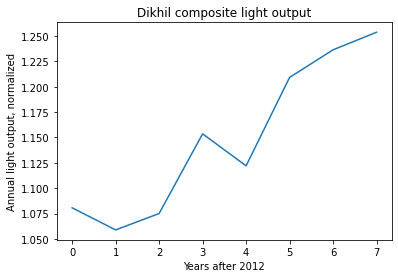

In [13]:
import matplotlib.pyplot as plt
dikhil = sections[:,120:135,140:155]
dims = dikhil.shape
dikhil = np.reshape(dikhil, (dims[0],dims[1]*dims[2]))

plt.plot(np.percentile(dikhil,90,axis=1))
plt.title("Dikhil composite light output")
plt.ylabel("Annual light output, normalized");
plt.xlabel("Years after 2012");